## Project summary

In this project we explore the data through the domain of unsupervised learning performing principal component analysis and clustering analysis. One goal of this project is to best describe the variation in the different types of players. Doing so would equip us with insight into how to best choose players in a team. In a high-dimensional data, it is often difficult to develop an intuition of the features and our goal in this project is to reduce the dimensionality of the dataset so that we can visualize the relationships between the features and clusters in our dataset. We start with 104 features and then further to just two principal components using PCA. We visualize the data using these principal components, perform clustering analysis and visualize the clusters.

##  Import the Libraries

In [1]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning algorithms
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


### loading dataset

In [2]:
fifa = pd.read_csv('players_20.csv')
fifa.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,83+3,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3
8,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia,Real Madrid,...,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,27,1992-06-15,175,71,Egypt,Liverpool,...,70+3,67+3,67+3,67+3,70+3,66+3,57+3,57+3,57+3,66+3


## Basic checks

In [3]:
fifa.shape

(18278, 104)

In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [5]:
# checking for null values
fifa.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [6]:
# Dropping unecessary columns
fifa.drop(['sofifa_id','nation_jersey_number','joined','dob','player_url',
           'long_name','nation_position','loaned_from','real_face']
          , axis = 1, inplace = True)


## Extracting Certain Columns¶

In [7]:
fifa.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'release_clause_eur',
       'player_tags', 'team_position', 'team_jersey_number',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina

## Visualization 

<AxesSubplot:xlabel='age', ylabel='count'>

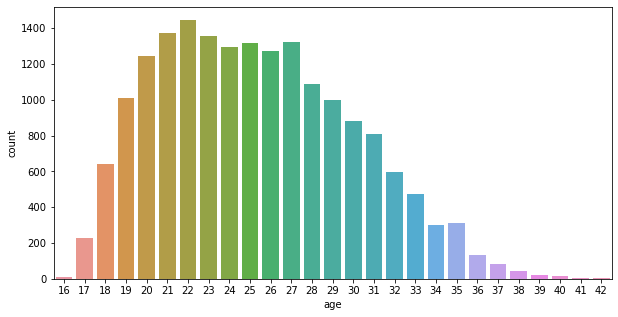

In [8]:
# Distribution of age of the players
plt.figure(figsize=(10,5))
sns.countplot(fifa['age'],data=fifa)

As we can see from above graph that maximum players are from 18-33 age group.

In [9]:
# minimum and maximum age of the players
print("The age of the youngest player is", fifa['age'].min())
print("The age of the oldest player is", fifa['age'].max())

The age of the youngest player is 16
The age of the oldest player is 42


In [10]:
# no. of players with least age
fifa.loc[fifa['age'] == fifa['age'].min()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4764,A. Hložek,16,185,80,Czech Republic,Sparta Praha,70,86,3500000,1000,...,52+2,50+2,50+2,50+2,52+2,49+2,46+2,46+2,46+2,49+2
6630,Fábio Silva,16,185,75,Portugal,FC Porto,68,85,1800000,1000,...,43+2,40+2,40+2,40+2,43+2,41+2,38+2,38+2,38+2,41+2
12158,E. Millot,16,175,65,France,AS Monaco,63,86,800000,1000,...,58+2,56+2,56+2,56+2,58+2,56+2,51+2,51+2,51+2,56+2
12160,S. Esposito,16,186,75,Italy,Inter,63,85,825000,2000,...,41+2,40+2,40+2,40+2,41+2,39+2,37+2,37+2,37+2,39+2
14626,A. Velasco,16,167,63,Argentina,Independiente,60,83,450000,1000,...,55+2,54+2,54+2,54+2,55+2,55+2,50+2,50+2,50+2,55+2
17614,D. Obbekjær,16,193,86,Denmark,Odense Boldklub,53,71,110000,1000,...,44+2,48+2,48+2,48+2,44+2,46+2,51+2,51+2,51+2,46+2
17782,S. Anderson,16,175,64,United States,Colorado Rapids,52,75,100000,1000,...,50+2,48+2,48+2,48+2,50+2,50+2,48+2,48+2,48+2,50+2
17827,D. Burns,16,176,62,Northern Ireland,St. Patrick's Athletic,52,69,100000,1000,...,43+2,39+2,39+2,39+2,43+2,42+2,36+2,36+2,36+2,42+2
18031,O. Stefánsson,16,190,75,Iceland,IFK Norrköping,51,64,60000,1000,...,43+2,45+2,45+2,45+2,43+2,46+2,50+2,50+2,50+2,46+2
18171,J. Starbuck,16,174,69,England,Grimsby Town,49,72,60000,1000,...,44+2,43+2,43+2,43+2,44+2,43+2,40+2,40+2,40+2,43+2


In [11]:
# no. of players with maximum age
fifa.loc[fifa['age'] == fifa['age'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
11832,C. Muñoz,42,177,73,Argentina,CD Universidad de Concepción,64,64,50000,1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13003,H. Sulaimani,42,173,70,Saudi Arabia,Al Ahli,63,63,0,5000,...,62+2,66+2,66+2,66+2,62+2,62+2,66+2,66+2,66+2,62+2


In [12]:
# Numerical columns
fifa.describe().columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties

<AxesSubplot:xlabel='age', ylabel='overall'>

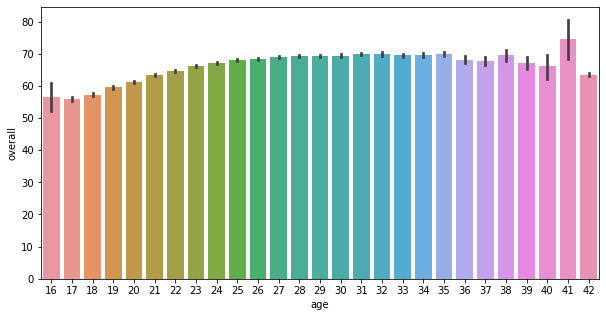

In [13]:
# Distribution of Age By Overall
plt.figure(figsize=(10,5))
sns.barplot(fifa['age'],fifa['overall'])

From the above graph we see that almost all the players have overall above 55.

In [14]:
# player who has maximum overall
fifa.loc[fifa['overall'] == fifa['overall'].max()][['short_name', 'age', 'overall']]

,short_name,age,overall
0,L. Messi,32,94


<AxesSubplot:xlabel='age', ylabel='potential'>

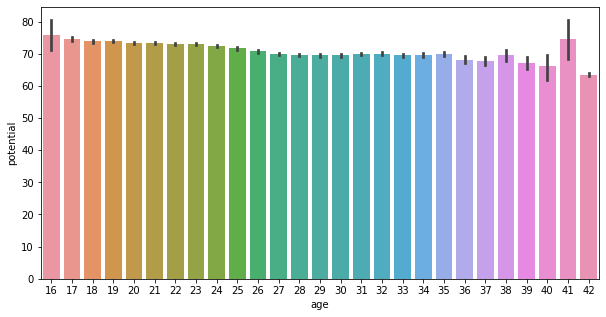

In [15]:
# Distribution of Age By Potential
plt.figure(figsize=(10,5))
sns.barplot(fifa['age'],fifa['potential'])

The above graph shows us that younger players has more potential than older age group players.It slowly decreases as players get older.

In [16]:
# player who has maximum potential
fifa.loc[fifa['potential'] == fifa['potential'].max()][['short_name', 'age', 'potential']]

,short_name,age,potential
10,K. Mbappé,20,95


<AxesSubplot:xlabel='age', ylabel='wage_eur'>

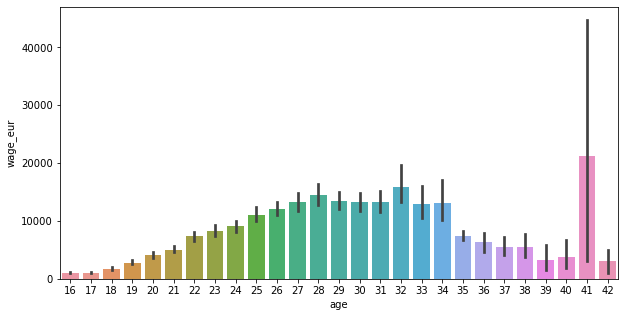

In [17]:
# wages of players w.r.t age
plt.figure(figsize=(10,5))
sns.barplot(fifa['age'],fifa['wage_eur'])

As we can see players of age group from 24-34 have higher wages compared to other age groups and players of age group 41 has higher wages compared to all other age groups, it may be due to certain factors.

In [18]:
# player who has maximum wages
fifa.loc[fifa['wage_eur'] == fifa['wage_eur'].max()][['short_name', 'age', 'wage_eur']]

,short_name,age,wage_eur
0,L. Messi,32,565000


In [19]:
# checking wages of players for a certain age
fifa.loc[fifa['age'] == 41][['short_name','age','overall','potential','wage_eur']]

,short_name,age,overall,potential,wage_eur
200,G. Buffon,41,83,83,58000
868,Hilton,41,78,78,21000
3706,C. Lucchetti,41,72,72,5000
10665,F. Kippe,41,65,65,1000


<AxesSubplot:xlabel='height_cm', ylabel='count'>

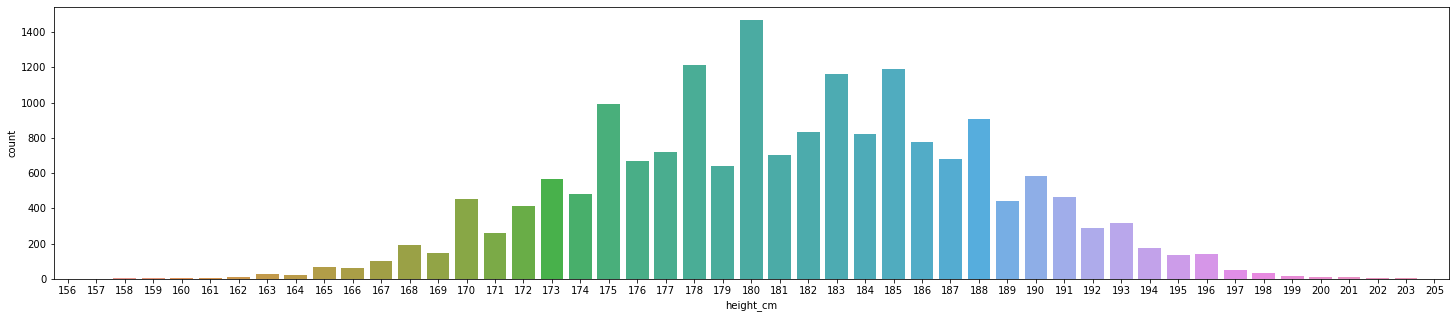

In [20]:
# count of players w.r.t height
plt.figure(figsize=(25,5))
sns.countplot(fifa['height_cm'],data=fifa)

We see that maximum players are of height 180cms.  

In [21]:
# player with minimum height
fifa.loc[fifa['height_cm'] == fifa['height_cm'].min()][['short_name', 'age', 'height_cm']]

,short_name,age,height_cm
4829,N. Barrios,21,156


In [22]:
# player with maximum height
fifa.loc[fifa['height_cm'] == fifa['height_cm'].max()][['short_name', 'age', 'height_cm']]

,short_name,age,height_cm
9208,T. Holý,27,205


In [23]:
# count of body types
fifa['body_type'].value_counts()

Normal                 10750
Lean                    6505
Stocky                  1016
PLAYER_BODY_TYPE_25        1
Messi                      1
Shaqiri                    1
Neymar                     1
Courtois                   1
Akinfenwa                  1
C. Ronaldo                 1
Name: body_type, dtype: int64

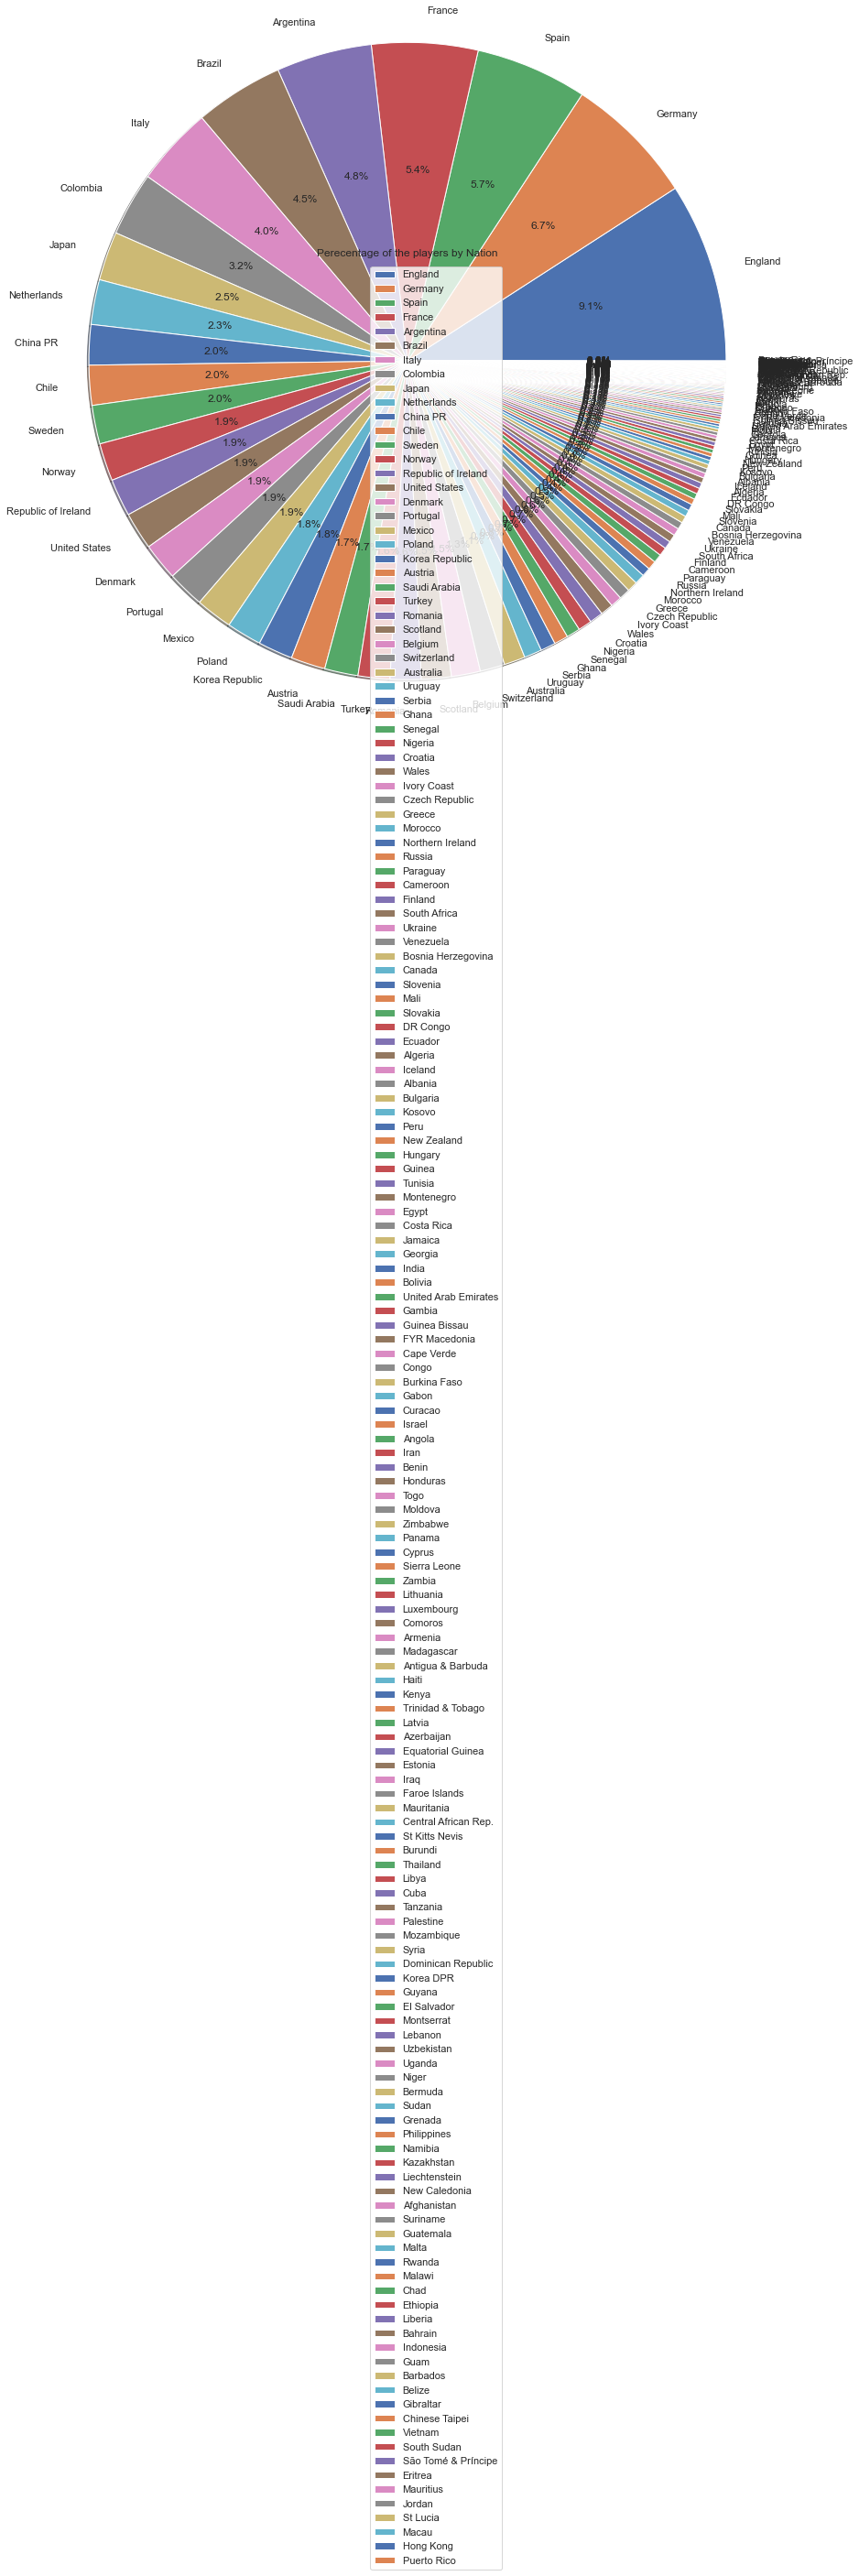

In [74]:
# Perecentage of the players by Nation
fifa['nationality'].value_counts()

label = fifa['nationality'].value_counts().index
name = fifa['nationality'].value_counts()

plt.pie(name,labels = label,shadow = True,autopct='%1.1f%%', radius = 4)
plt.title('Perecentage of the players by Nation')
plt.legend()
plt.show()

Maximum players are from England, Germany, Spain, France, Argentina, Brazil, Italy and Colombia.

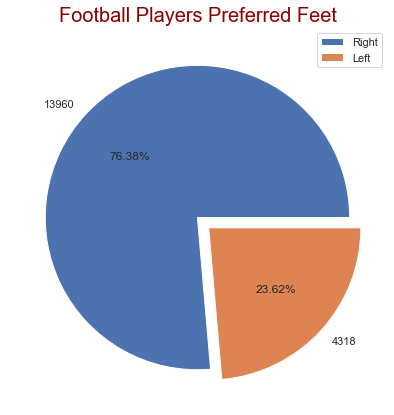

In [63]:
preferred_foot_values = fifa["preferred_foot"].value_counts().values
plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, [0,0.1], labels=preferred_foot_values, autopct='%0.2f%%')
plt.title('Football Players Preferred Feet',color = 'darkred',fontsize = 20)
plt.legend(['Right', 'Left'])

So from the Pie chart we can see that maximum players prefer Right leg

<AxesSubplot:xlabel='value_eur', ylabel='club'>

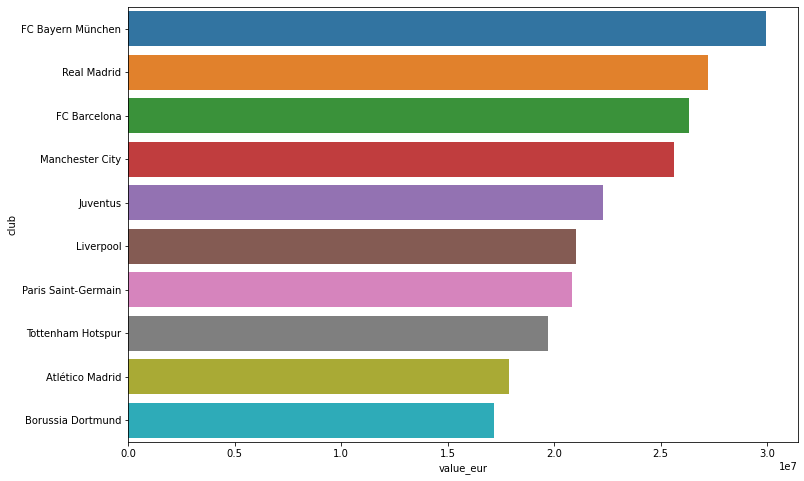

In [26]:
# checking net values of each club
plt.figure(figsize=(12,8))
clb = fifa.groupby('club')['value_eur'].mean().reset_index().sort_values('value_eur',ascending=False).head(10)
fig = sns.barplot( x=clb["value_eur"] ,y=clb["club"] )
fig

So from the bar graph, FC Bayern Munchen club has the highest net value than other clubs and Borussia Dortmund club has lowest net value 

<AxesSubplot:xlabel='wage_eur', ylabel='club'>

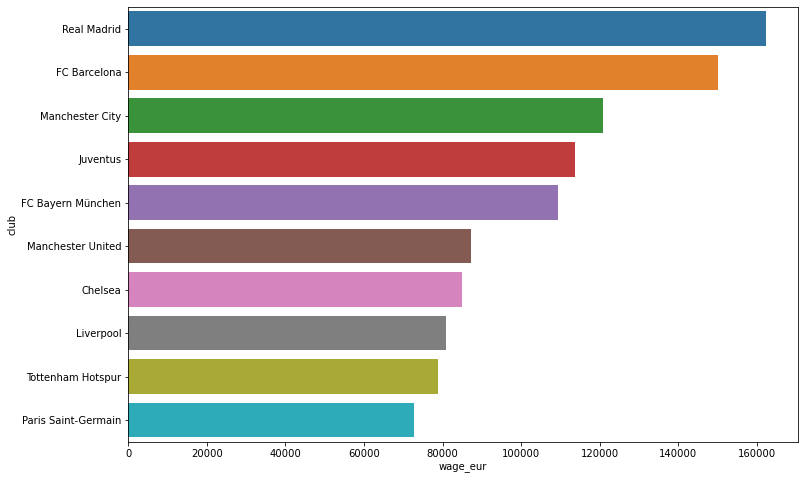

In [27]:
# checking wages of players in each club
plt.figure(figsize=(12,8))
clb = fifa.groupby('club')['wage_eur'].mean().reset_index().sort_values('wage_eur',ascending=False).head(10)
fig = sns.barplot( x=clb["wage_eur"] ,y=clb["club"] )
fig

From the above graph we can see that Real Madrid has the highest wage rate and Paris Saint-Germain has lowest wage rate.

<AxesSubplot:xlabel='potential', ylabel='club'>

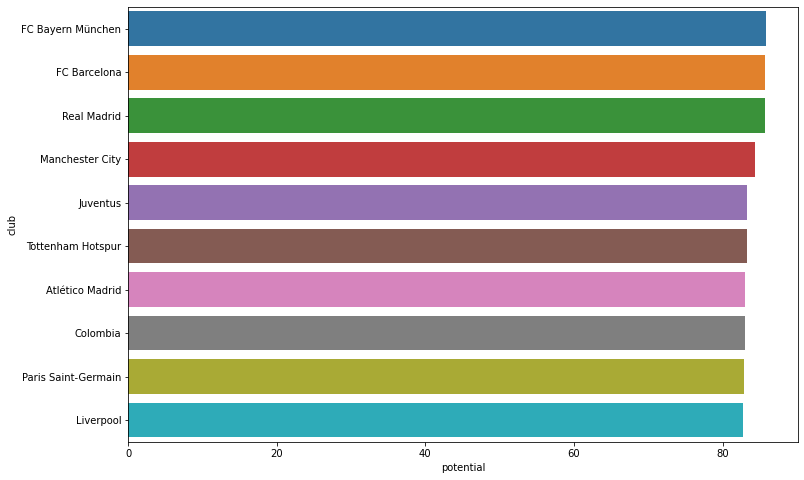

In [28]:
# checking the potential of players in each club
plt.figure(figsize=(12,8))
clb = fifa.groupby('club')['potential'].mean().reset_index().sort_values('potential',ascending=False).head(10)
fig = sns.barplot( x=clb["potential"] ,y=clb["club"] )
fig

So from the bar graph we can see that almost all the clubs have high potential.

<AxesSubplot:xlabel='age', ylabel='club'>

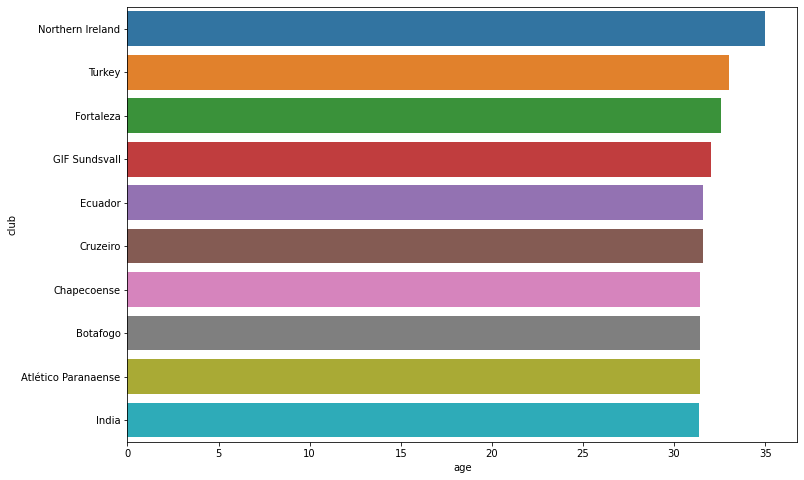

In [29]:
# checking for players' age in each club
plt.figure(figsize=(12,8))
clb = fifa.groupby('club')['age'].mean().reset_index().sort_values('age',ascending=False).head(10)
fig = sns.barplot( x=clb["age"] ,y=clb["club"] )
fig

so From the bar graph, almost all the clubs have players of above age group 30.

<AxesSubplot:xlabel='overall', ylabel='club'>

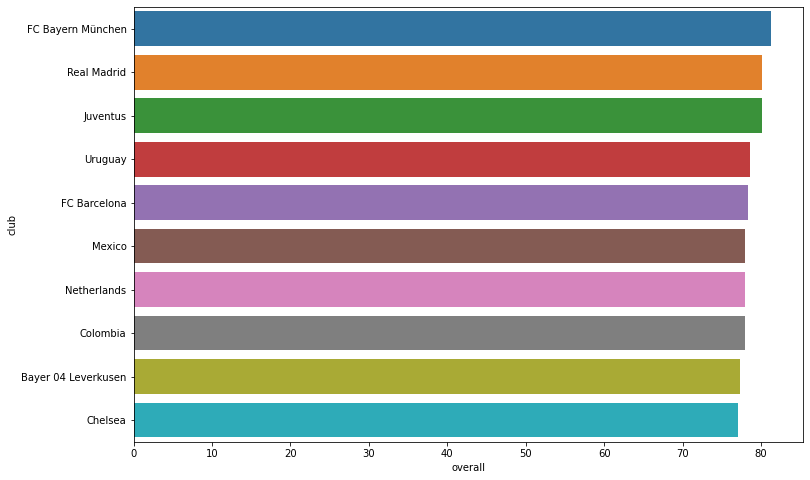

In [30]:
# checking for players' overall in each club
plt.figure(figsize=(12,8))
clb = fifa.groupby('club')['overall'].mean().reset_index().sort_values('overall',ascending=False).head(10)
fig = sns.barplot( x=clb["overall"] ,y=clb["club"] )
fig

So from the bar graph we can see that almost all the clubs have overall of players above 70.

<AxesSubplot:xlabel='power_stamina', ylabel='club'>

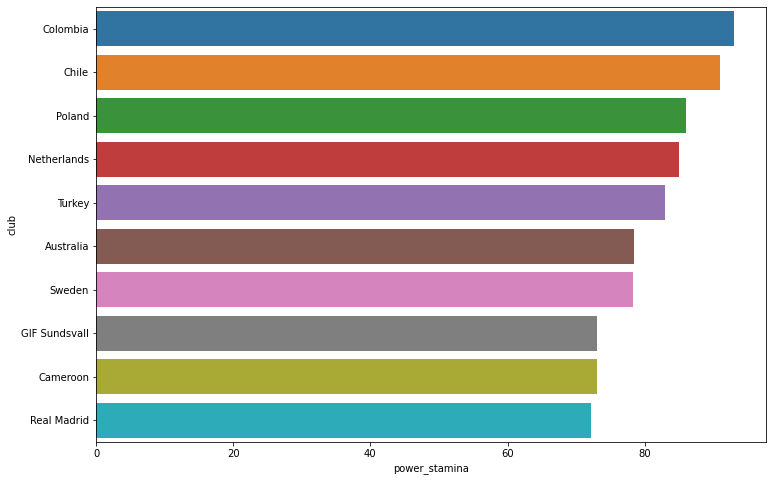

In [31]:
# checking for players' stamina in each club
plt.figure(figsize=(12,8))
clb = fifa.groupby('club')['power_stamina'].mean().reset_index().sort_values('power_stamina',ascending=False).head(10)
fig = sns.barplot( x=clb["power_stamina"] ,y=clb["club"] )
fig

From above graph we can say that Colombia has players with maximum power stamina compared to other clubs

<AxesSubplot:xlabel='international_reputation', ylabel='club'>

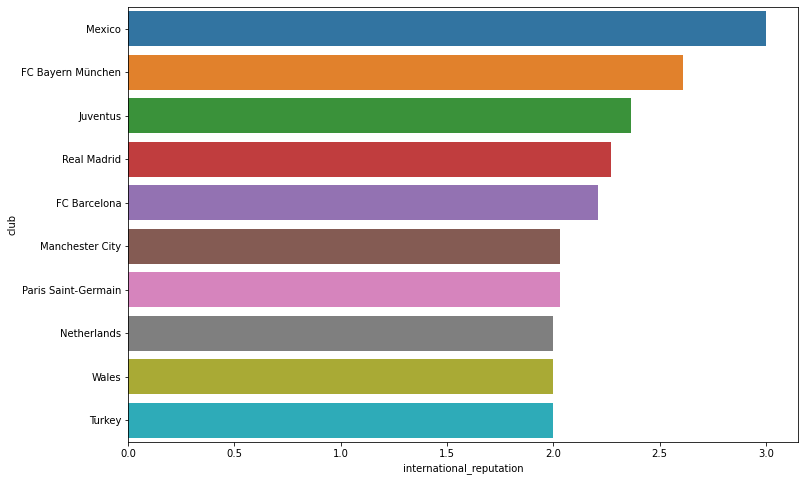

In [32]:
# checking for players' international reputation in each club
plt.figure(figsize=(12,8))
clb = fifa.groupby('club')['international_reputation'].mean().reset_index().sort_values('international_reputation',ascending=False).head(10)
fig = sns.barplot( x=clb["international_reputation"] ,y=clb["club"] )
fig

From above graph we can say that Mexico has highest international reputation compared to other clubs

In [34]:
df = fifa[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

df.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8


In [35]:
# Considering players who has overall above 85  
df = df[df.overall > 85]
df

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Coutinho,27,172,68,86,86,46500000,175000,3,4,...,70,77,55,54,47,12,7,9,14,6
69,Parejo,30,182,74,86,86,41000000,69000,2,4,...,83,85,69,68,65,5,9,12,14,8
70,T. Müller,29,186,75,86,86,43500000,170000,4,4,...,60,84,44,57,46,6,7,11,14,14
71,C. Immobile,29,185,85,86,86,44500000,105000,3,4,...,78,81,34,33,32,6,8,15,12,6


In [36]:
# checking for null values
df.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             1
team_jersey_number             0
contract_valid_until           0
pace                          11
shooting                      11
passing                       11
dribbling                     11
defending                     11
physic                        11
gk_diving                     62
gk_handling                   62
gk_kicking                    62
gk_reflexes                   62
gk_speed                      62
gk_positioning                62
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_

In [37]:
# Replace null values with mean
df = df.fillna(df.mean())

In [38]:
names = df.short_name.tolist() # saving names for later

# dropping the short name column as we dont need
df = df.drop(['short_name'], axis = 1)
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8


## Normalize (rescale) the data

In [39]:
from sklearn import preprocessing

x = df.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

## Use PCA to reduce 60 columns into 2

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
reduced = pd.DataFrame(pca.fit_transform(X_norm))

## Perform K-Means clustering

In [41]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)

model.fit(reduced)

prediction = model.predict(reduced)

centroid = model.cluster_centers_

clusters = model.labels_.tolist()

## Make a new data frame by adding players' names and their cluster

In [42]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.333810,-1.348607,2,L. Messi
1,-1.028435,-1.001324,2,Cristiano Ronaldo
2,-1.206544,-1.500715,2,Neymar Jr
3,3.059785,-0.787172,1,J. Oblak
4,-1.085036,-1.285346,2,E. Hazard


## Visualization

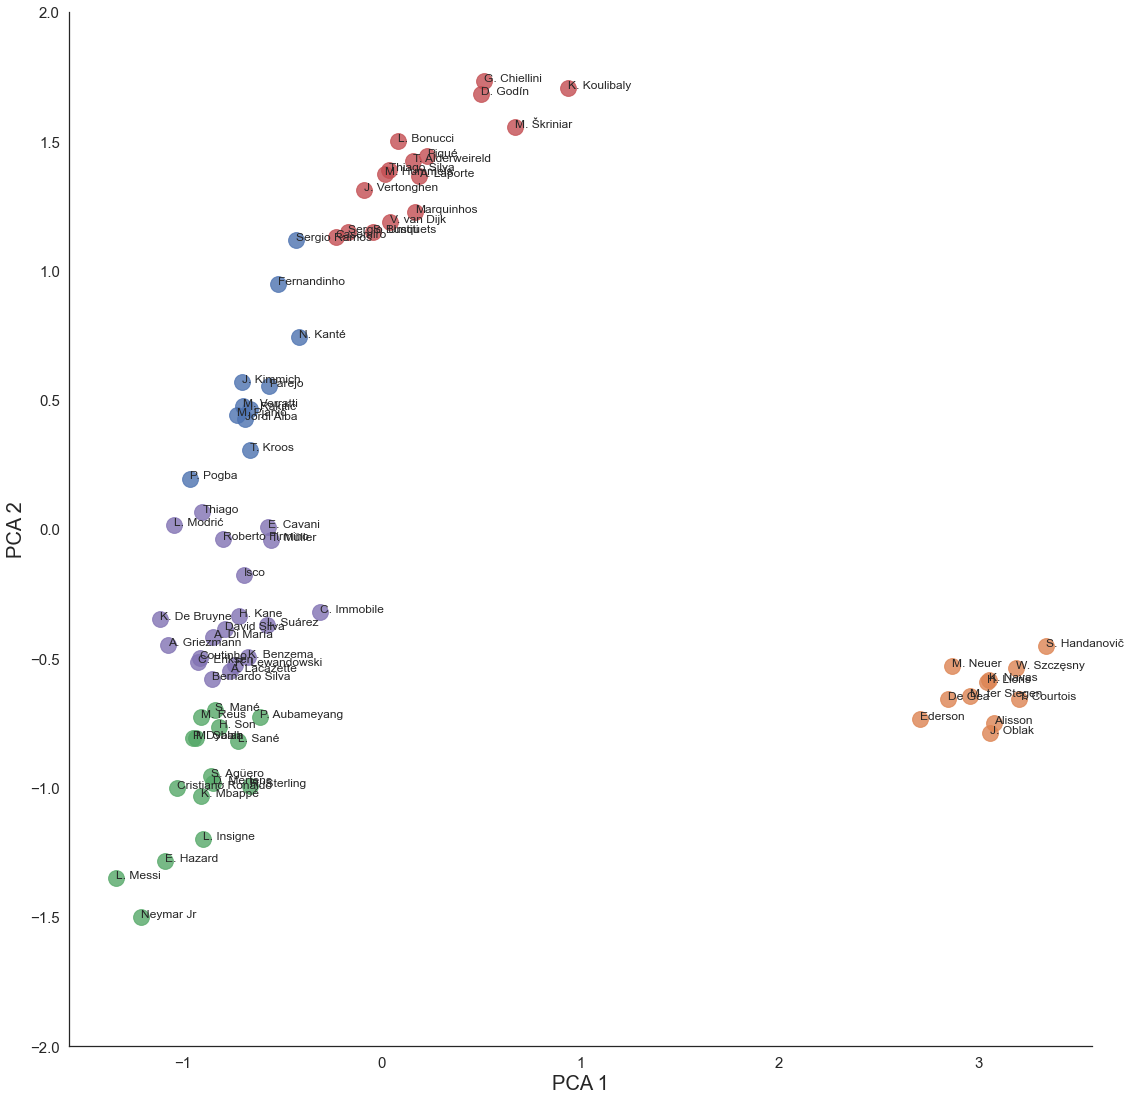

In [43]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 15, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PCA 1", fontsize = 20)
plt.ylabel("PCA 2", fontsize = 20)

plt.show()

## Conclusion